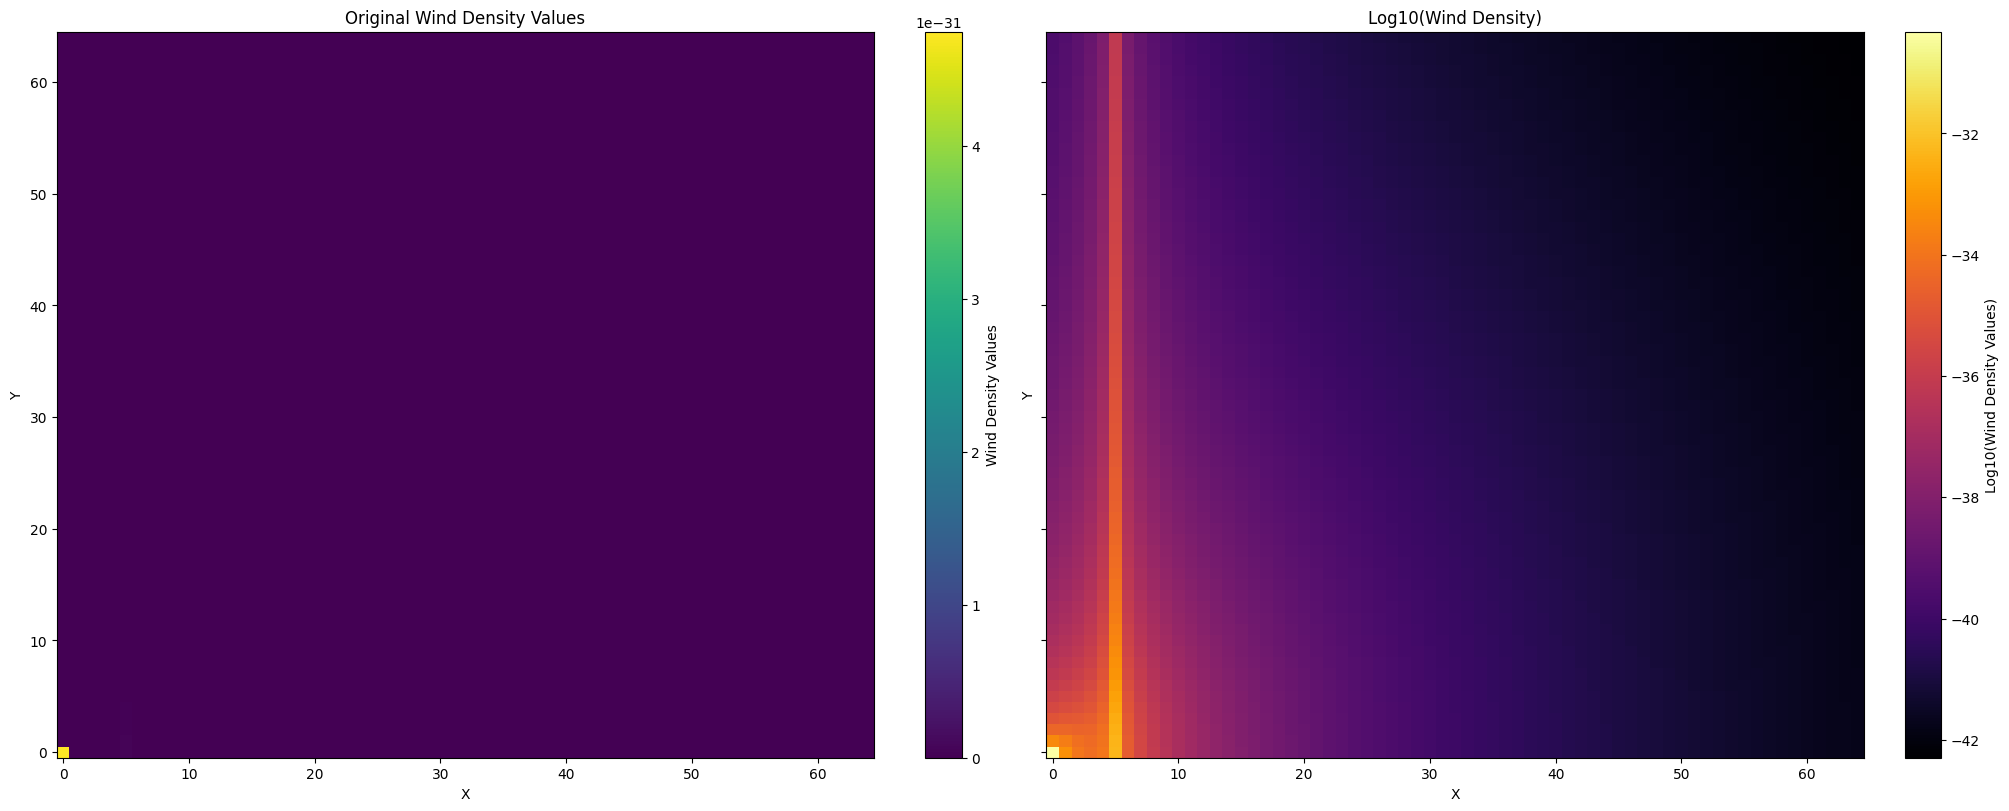

In [12]:
import numpy as np
import matplotlib.pyplot as plt

wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')
log_wind_density_data = np.log10(np.abs(wind_density_data) + 1e-50) 

x_range = np.linspace(0, wind_density_data.shape[1] - 1, wind_density_data.shape[1])
y_range = np.linspace(0, wind_density_data.shape[0] - 1, wind_density_data.shape[0])
X, Y = np.meshgrid(x_range, y_range)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), constrained_layout=True, sharey=True)

pcm = axes[0].pcolormesh(X, Y, wind_density_data, shading='auto', cmap='viridis')
fig.colorbar(pcm, ax=axes[0], label='Wind Density Values')
axes[0].set_title('Original Wind Density Values')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

pcm = axes[1].pcolormesh(X, Y, log_wind_density_data, shading='auto', cmap='inferno')
fig.colorbar(pcm, ax=axes[1], label='Log10(Wind Density Values)')
axes[1].set_title('Log10(Wind Density)')
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

plt.show()
